In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2

# New Font Based Model
https://archive.ics.uci.edu/ml/datasets/Character+Font+Images#

# Font Based Data

In [2]:
fnt_directories = glob.glob('./datasets/Characters/Fnt/*/')
len(fnt_directories)

62

In [4]:
fnt_data = []
fnt_labels = []
for folder in fnt_directories:
    label = int((folder[-4:])[:3])
    for file in glob.glob(folder+'/*'):
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (28,28))
        image_arr = np.array(image)
        fnt_data.append(image_arr)
        fnt_labels.append(label)

In [5]:
np_fnt_data = np.array(fnt_data)
np_fnt_labels = np.array(fnt_labels)


In [6]:
np.unique(np_fnt_labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62])

In [7]:
np_fnt_data.shape, np_fnt_labels.shape

((62992, 28, 28), (62992,))

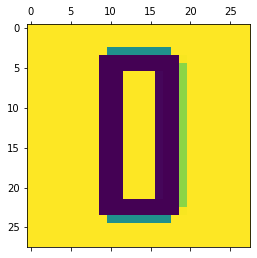

In [8]:
plt.matshow(np_fnt_data[1])

# Handwritten Data

In [29]:
hnd_directories = glob.glob('./datasets/Characters/Img/*/')
len(hnd_directories)

62

In [30]:
hnd_data = []
hnd_labels = []
for folder in hnd_directories:
    label = int((folder[-4:])[:3])
    for file in glob.glob(folder+'/*'):
        image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (28,28))
        image_arr = np.array(image)
        hnd_data.append(image_arr)
        hnd_labels.append(label)

In [31]:
np_hnd_data = np.array(hnd_data)
np_hnd_labels = np.array(hnd_labels)

In [32]:
np_hnd_data.shape, np_hnd_labels.shape

((3410, 28, 28), (3410,))

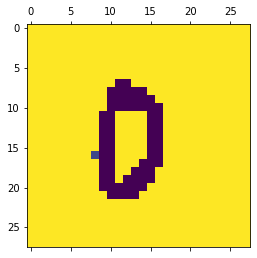

In [33]:
plt.matshow(np_hnd_data[1])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 array([1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016], dtype=int64))

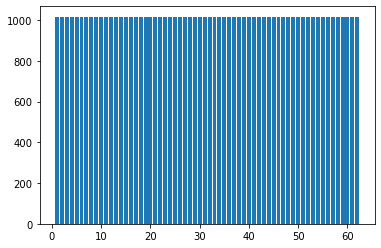

In [9]:
indices, n_indices = np.unique(np.hstack([np_fnt_labels]), return_counts=True)
plt.bar(indices, n_indices)
indices, n_indices

# Complete Data

In [10]:
# data = np.vstack((np_fnt_data,np_hnd_data))
# labels = np.hstack((np_fnt_labels,np_hnd_labels))
data = np_fnt_data
labels = np_fnt_labels - 1
data = data / 255
# labels -= 1
# temp = (labels > 35) * 26
# labels = labels - temp
data.shape, labels.shape


((62992, 28, 28), (62992,))

In [12]:
np_fnt_labels

array([ 1,  1,  1, ..., 62, 62, 62])

In [13]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

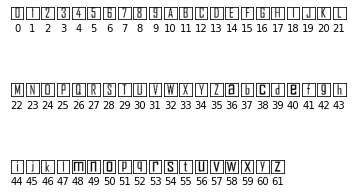

In [14]:
 _, unq_ind= np.unique(labels, return_index=True)
for i in range(len(unq_ind)):
    plt.subplot(3, 22, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels[unq_ind[i]])
    plt.imshow(data[unq_ind[i]],cmap ="gray")

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((47244, 28, 28), (47244,), (15748, 28, 28), (15748,))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 array([1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016, 1016,
        1016, 1016, 1016, 1016, 1016, 1016, 1016], dtype=int64))

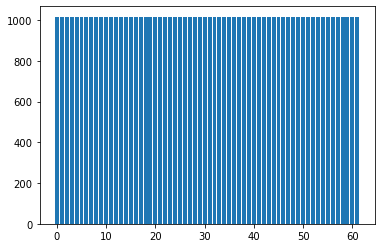

In [16]:
indices, n_indices = np.unique(labels, return_counts=True)
plt.bar(indices, n_indices)
indices, n_indices

# MNIST

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
(np_mnist_data, np_mnist_labels), (_, _) = load_data()
np_mnist_data.shape

(60000, 28, 28)

In [ ]:
x_trainM , x_testM,y_trainM,y_testM = train_test_split(np_mnist_data, np_mnist_labels)

# Model

In [17]:
from tensorflow import keras

In [19]:
model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
   
    keras.layers.Conv2D(16,(4,4),padding= 'same',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(32,(4,4)),
    keras.layers.MaxPooling2D(3,3),
#     keras.layers.Conv2D(64,(3,3)),
#     keras.layers.MaxPooling2D(3,3),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(500, activation='relu'),
#     keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
#     keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dropout(0.1),
    keras.layers.Dense(len(unq_ind),activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
#               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1477/1477 [==============================] - 13s 8ms/step - loss: 0.9814 - accuracy: 0.7243
Epoch 2/10
1477/1477 [==============================] - 12s 8ms/step - loss: 0.5209 - accuracy: 0.8260
Epoch 3/10
1477/1477 [==============================] - 12s 8ms/step - loss: 0.4239 - accuracy: 0.8501
Epoch 4/10
1477/1477 [==============================] - 11s 8ms/step - loss: 0.3688 - accuracy: 0.8659
Epoch 5/10
1477/1477 [==============================] - 12s 8ms/step - loss: 0.3250 - accuracy: 0.8780
Epoch 6/10
1477/1477 [==============================] - 11s 8ms/step - loss: 0.2938 - accuracy: 0.8871
Epoch 7/10
1477/1477 [==============================] - 12s 8ms/step - loss: 0.2706 - accuracy: 0.8951
Epoch 8/10
1477/1477 [==============================] - 13s 9ms/step - loss: 0.2511 - accuracy: 0.9028
Epoch 9/10
1477/1477 [==============================] - 14s 9ms/step - loss: 0.2349 - accuracy: 0.9088
Epoch 10/10
1477/1477 [==============================] - 13s 9ms/step - l

# Model Test Accuracy

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc * 100

493/493 [==============================] - 3s 5ms/step - loss: 0.3513 - accuracy: 0.8762


87.61747479438782

In [22]:
imgs = []

# test_data = pd.read_csv("./datasets/fonts/ARIAL.csv")

# df_labelled = test_data[test_data['m_label'].between(65,90, inclusive=True)]
# df_labelled = df_labelled.append(test_data[test_data['m_label'].between(97,122, inclusive=True)], ignore_index=True)
# df_labelled = df_labelled.append(test_data[test_data['m_label'].between(48,57, inclusive=True)], ignore_index=True)

# X_fnt, Y_fnt = np.array(df_labelled.iloc[:, -400:], dtype=np.float64), np.array(df_labelled.loc[:, 'm_label'], dtype=np.int64)
# Y_fnt[Y_fnt<58] -= 48
# Y_fnt[Y_fnt>96] -= 61
# Y_fnt[Y_fnt>64] -= 55

# fnc = np.vectorize(lambda img: cv2.resize(img,(28,28)))


for path in glob.glob("./datasets/*.jpg"):
    img = cv2.imread(path)
    gryImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resImg = cv2.resize(gryImg, (28,28))
    imgs.append(resImg)

npImgs = np.array(imgs)

In [ ]:
model.evaluate(X_fnt,Y_fnt)

ValueError: in user code:

    File "C:\Users\PRATEEK SINGH\anaconda3\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\PRATEEK SINGH\anaconda3\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\PRATEEK SINGH\anaconda3\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\PRATEEK SINGH\anaconda3\lib\site-packages\keras\engine\training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\PRATEEK SINGH\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\PRATEEK SINGH\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_36" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 400)


In [23]:

predictions = np.argmax(model.predict(npImgs),axis=1)




NameError: name 'npImgs' is not defined

In [24]:
model.save("./models/character_recognition_update")

INFO:tensorflow:Assets written to: ./models/character_recognition_update\assets


In [25]:
for i in range(npImgs.shape[0]):

    # plt.matshow(npImgs[i])
    # plt.xlabel(predictions[i])
    print(predictions[i])

49
49
49
49
49
49
49
49
23
23
23
23
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
23
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
23
23
23
23
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
23
23
23
23
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
56
49
49
49
49
49
49
23
23
23
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
4

(28, 28)


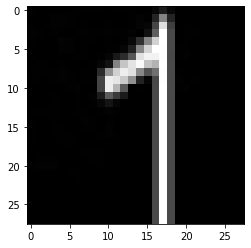

In [ ]:
test_image = cv2.cvtColor(cv2.imread('./datasets/1.jpg'), cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image, (28,28))
print(test_image.shape)
plt.imshow(test_image, cmap='gray')

In [ ]:
images = np.array([test_image])
images.shape

(1, 28, 28)

In [ ]:
predictions = model.predict(images)
pred_test = np.argmax(predictions, axis=1)

In [ ]:
pred_test

array([1], dtype=int64)

# Actual Test Accuracy

In [ ]:
(fail_cases,) = np.nonzero(pred_test != y_test)
fail_cases

array([   0,    1,    2, ..., 9957, 9958, 9960])

(14, 57)

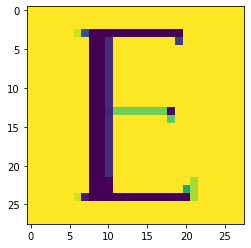

In [ ]:
plt.imshow(x_test[fail_cases[0]])
y_test[fail_cases[0]], pred_test[fail_cases[0]]

In [ ]:
# Actual False counts where the predicted character is not the capital/small-case variant of the labelled character
false_count = 0
for i in fail_cases:
    if(y_test[i] > 9 and abs(y_test[i]-pred_test[i]) != 26):
        false_count += 1
(len(pred_test)-false_count)*100 / len(pred_test)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
prob_model.save('./models/character-recognition')

INFO:tensorflow:Assets written to: ./models/character-recognition/assets
